# Python для анализа данных

*Алла Тамбовцева, Татьяна Рогович, НИУ ВШЭ*

## Массивы `NumPy`

# Массив

Массив - это контейнер, который:
- упорядоченный набор элементов
- изменяемый (добавить, удалять эл-ты)
- **все эл-ты одного типа данных**

Контейнеры - хранят более одного эл-та:

- списки, кортежи, словари

### Базовые операции с массивами

Сегодня мы познакомимся с библиотекой `NumPy` (сокращение от *Numeric Python*), которая часто используется в задачах, связанных с машинным обучением.

Чтобы мы смогли на конкретных примерах увидеть, зачем эта библиотека используется, давайте её импортируем. Если вы уже устанавливали Anaconda, то библиотека `numpy` также была установлена на ваш компьютер. Проверим: импортируем библиотеку с сокращённым названием, так часто делают, чтобы не «таскать» за собой в коде длинное название. Сокращение `np` для библиотеки `numpy` – распространённое, можно даже сказать, общепринятое, его часто можно увидеть в документации или официальных тьюториалах.

In [1]:
import numpy as np
#вектор 1D
#матрица D>=2

Возможности:
   - поддержка многомерных массивов (включая матрицы);
   - поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами.  
    
Так же numpy лежить в основе датафреймов pandas, и многие вещи (фильтрация, индексирование, математические операции), которые обсудим в этом уроке, потом транслируются в pandas.

В `Python` к числовым типам относятся:
   - int
   - float
   - bool
   - complex   
   
В `numpy` имеются эти типы, а также обёртки над этими типами, которые **используют реализацию типов на C**, например, `int8`, `int16`, `int32`, `int64` (подробнее о типах данных `numpy` можно прочитать [здесь](https://www.numpy.org/devdocs/user/basics.types.html)). За счёт того, что используются типы данных из C, numpy получает ускорение операций.

In [2]:
type(np.int(32)), type(np.int32(32)), type(np.int64(32))

(int, numpy.int32, numpy.int64)

**Переполнение**

В связи с особенностями типов `numpy` важно помнить о переполнении.   
Например, 64-битный int в С хранит числа от -9223372036854775808 до 9223372036854775807

In [3]:
print(np.int64(1e10)) # все поместилось 10**10

10000000000


In [4]:
print(np.int64(10e18)) # не поместилось

OverflowError: Python int too large to convert to C long

In [5]:
print(10e18) # а в стандартный питоновский integer - помещается

1e+19


# Массивы Ndarray

Основыным объектом `numpy` является Ndarray – это n-мерный массив (сокращение от *n-dimensional array*), структура данных, которая позволяет хранить набор элементов одного типа: либо только целые числа, либо числа с плавающей точкой, либо строки, либо булевы (логические) значения. 

Производить вычисления с массивами гораздо быстрее и эффективнее чем со списками.

Массивы могут быть одномерными, то есть визуально ничем не отличаться от простого списка значений.


In [6]:
a = [1, 2, 3]
b = [4, 5, 6]
#a + b = [5, 7, 9]

In [7]:
a + b

[1, 2, 3, 4, 5, 6]

In [8]:
a * 2

[1, 2, 3, 1, 2, 3]

In [9]:
aa = np.array([1, 2, 3])
bb = np.array(b)

In [10]:
aa + bb #поэлементное сложение массивов

array([5, 7, 9])

In [11]:
aa * 2

array([2, 4, 6])

In [15]:
arr = aa * 2.5

In [16]:
type(arr)
#n dimensional array

numpy.ndarray

In [17]:
type(arr[0])

numpy.float64

In [30]:
import numpy as np
z = np.array([0, 2, 3, 4])
z

array([0, 2, 3, 4])

In [ ]:
#вектор - 1D массив
#матрица - массив, D >=2 D - dimension

In [36]:
z.shape

(4,)

In [31]:
z[1]

2

А могут быть многомерными (n-мерными), то есть представлять собой вложенный список («список списков»):

In [32]:
y = np.array([[1, 2], [1, 0 ], [3, 4], [3, 5]])  # двумерный
y

array([[1, 2],
       [1, 0],
       [3, 4],
       [3, 5]])

In [35]:
y.shape #размер матрицы: кол-во строк, кол-во столбцов

(4, 2)

In [37]:
y.ndim #размерность матрицы n dimensions

2

In [38]:
y.size #y.shape[0] * y.shape[1]

8

In [33]:
y[0]

array([1, 2])

Или даже «список таблиц»:

In [24]:
x = np.array([[[6, 3],
        [6, 8]],
      [[1, 100],
        [0, 1]]])  # трехмерный

In [27]:
x

array([[[  6,   3],
        [  6,   8]],

       [[  1, 100],
        [  0,   1]]])

In [26]:
x.shape

(2, 2, 2)

In [28]:
x[0]

array([[6, 3],
       [6, 8]])

In [40]:
x[0][1]

array([6, 8])

In [39]:
x[0, 1]

array([6, 8])

In [41]:
x[0][1][1]

8

In [11]:
x[1][0][1] # вторая колонка первой строки второго измерения

100

Мы чаще всего будем работать с двумерными массивами. Про двумерный массив можно думать как про матрицу или про таблицу. Так, массив во втором примере выше можно рассматривать как таблицу, состояшую из двух строк и трёх столбцов, как таблицу $2 \times 3$ (сначала указывается число строк, затем – число столбцов). Отсюда следует важный факт: число элементов в списках внутри массива должно совпадать. Проверим на примере – возьмём списки разной длины, то есть списки, состоящие из разного числа элементов, и объединим их в массив:

In [42]:
lst = [[0, 0, 1],
         [0, 1]]
lst

[[0, 0, 1], [0, 1]]

In [43]:
np.array([[0, 0, 1],
         [0, 1]]) 

<ipython-input-43-372b51043c53>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([[0, 0, 1],


array([list([0, 0, 1]), list([0, 1])], dtype=object)

Получилось что-то немного странное. Никакой ошибки Python не выдал, но воспринимать этот объект как полноценный массив он уже не будет: он будет считать, что в такой таблице у нас есть две строки и ноль столбцов!

Теперь давайте посмотрим, что будет, если мы попробуем объединить в массив объекты разных типов, например, целые числа и числа с плавающей точкой:

In [44]:
np.array([[5, 8.2], 
         [1.2, 1,]])

array([[5. , 8.2],
       [1.2, 1. ]])

In [45]:
np.array([[5, 8.2], 
         [1.2, 'ba']])

array([['5', '8.2'],
       ['1.2', 'ba']], dtype='<U32')

In [46]:
q = np.array([[1, 2,],
             [3, 4]])
w = np.array([[5, 6], 
             [7, 8]])

In [47]:
q + w

array([[ 6,  8],
       [10, 12]])

In [49]:
q

array([[1, 2],
       [3, 4]])

In [51]:
a

array([1, 2, 3])

In [55]:
a = np.array([[1,2,3]]) #1D array
b = a.T

In [58]:
a #вектор-строка

array([[1, 2, 3]])

In [56]:
a.shape

(1, 3)

In [59]:
b #вектор-столбец

array([[1],
       [2],
       [3]])

In [57]:
b.shape

(3, 1)

In [48]:
q.T #транспонирование: меняет местами строки и солбцы

array([[1, 3],
       [2, 4]])

Все элементы были автоматически приведены к одному типу (можно считать, что тип *float* «сильнее» типа *integer*). Можете самостоятельно проверить, что будет, если мы «смешаем» в списке строковые и числовые значения.

Чем же удобны массивы? Во-первых, они занимают меньше места и памяти. Во-вторых, с ними очень удобно работать: все операции над массивами будут производиться поэлементно: то есть, для выполнения действий над каждым элементом массива, нам не придется использовать какие-то специальные конструкции вроде циклов, мы сможем обращаться сразу ко всему массиву. Например, давайте представим, что у нас есть массив со значениями явки на выборы в долях, а мы хотим получить результаты в процентах (домноженные на 100).

В отличие от питоновских листов - ndarray - это полноценный вектор. И он поддерживает операции над векторами. Так пример выше - это умножение вектора на скаляр.

In [16]:
s = [2,1]
s*2

[2, 1, 2, 1]

In [60]:
turnout = np.array([0.62, 0.43, 0.79, 0.56])
turnout

array([0.62, 0.43, 0.79, 0.56])

Чтобы домножить каждое число в массиве на 100, нам достаточно домножить на 100 `turnout`:

In [61]:
turnout * 100  # готово! умножение на скаляр

array([62., 43., 79., 56.])

Точно так же можем производить операции с несколькими массивами — действия будут выполняться поэлементно (сложение векторов)

In [62]:
[2, 3, 5]+[0, 8, 6]

[2, 3, 5, 0, 8, 6]

In [72]:
# поэлементное сложение векторов
A = np.array([2, 3, 5])
B = np.array([0, 8, 6])

print(A + B)
print(A * B)

[ 2 11 11]
[ 0 24 30]


In [73]:
A = np.array([[2, 3, 5]])
B = A.T

print(A + B)
print(A * B)

[[ 4  5  7]
 [ 5  6  8]
 [ 7  8 10]]
[[ 4  6 10]
 [ 6  9 15]
 [10 15 25]]


In [71]:
B

array([[2],
       [3],
       [5]])

In [69]:
A.shape

(1, 3)

In [70]:
B.shape

(3, 1)

In [64]:
# полеэментное умножение векторов
A * B

array([ 0, 24, 30])

Выполним сразу несколько действий — посчитаем явку на основе массивов с числом действительных и недействительных бюллетеней.

In [74]:
valid = np.array([32, 45, 50, 44])# действительные бюллетени
invalid = np.array([3, 11, 2, 6]) # недействительные бюллетени
total = np.array([65, 72, 80, 100]) # всего зарегистрированных избирателей

(valid + invalid) / total * 100

array([53.84615385, 77.77777778, 65.        , 50.        ])

# New heading

# <a id="Массивы ndarray и операции с ними"><span style="color:green">Массивы ndarray и операции с ними</span></a>

Наиболее важные атрибуты объектов ndarray:
1. **`ndarray.ndim`** - число измерений (чаще их называют "оси") массива.
  
2. **`ndarray.shape`** - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.
3. **`ndarray.size`** - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.
4. **`ndarray.dtype`** - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. Можно хранить и numpy типы, например: bool, int16, int32, int64, float16, float32, float64, complex64


Одномерный массив

In [87]:
M = np.array([[2, 5], 
              [6, 8], 
              [1, 3],
             [2, 3], 
             [5, 6]])
M

array([[2, 5],
       [6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

In [76]:
M.dtype

dtype('int64')

Массивы бывают многомерными, значит, у массива есть число измерений. Давайте его найдём:

In [77]:
M.ndim  # dimensions

2

Действительно, всего два измерения: чтобы указать на число 5 из этого массива, нам понадобятся всего две координаты – номер строки и номер столбца. Теперь посмотрим на форму или вид массива (*shape*):

In [78]:
M.shape  # 3 строки и 2 столбца, т.е. 3 списка по 2 элемента

(3, 2)

Кроме того, можем найти общее число элементов в массиве, его длину, размер (*size*):

In [26]:
M.size  # всего 6 элементов

6

### Работа с элементами массива

Если нам нужно обратиться к элементам массива, то эта операция будет похожа на работу со вложенными списками:

In [79]:
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [80]:
M[0]  # весь первый список в M

array([2, 5])

In [81]:
M[0][1]  # второй элемент первого списка в M

5

Или не совсем как со списками, без двойных скобок:

In [82]:
M[0, 1]

5

Ещё можно выбирать сразу несколько элементов массива. Для этого воспользуемся срезами (*slices*):

In [93]:
M[1]

array([6, 8])

In [88]:
M

array([[2, 5],
       [6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

In [96]:
M[1:3, 0]

array([6, 1])

In [97]:
M[1:3]

array([[6, 8],
       [1, 3]])

In [95]:
M[1:3][0]  # с элемента с индексом 0 до элемента с индексом 1 включительно

array([6, 8])

Обратите внимание: правый конец среза не включается.

Концы среза можно опускать, если нас интересуют все элементы, начиная с некоторого элемента и до конца массива или начиная с первого элемента массива и до некоторого элемента (правый конец точно так же включаться не будет):

In [99]:
M

array([[2, 5],
       [6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

In [98]:
M[1:] # с элемента с индексом 1 до конца

array([[6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

In [100]:
M[:2] # с начала массива до элемента с индексом 1 включительно

array([[2, 5],
       [6, 8]])

Еще можно взять полный срез – выбрать все элементы массива:

In [102]:
M[:] 

array([[2, 5],
       [6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

Кроме того, при выборе элементов можно выставлять шаг. По умолчанию мы выбираем все элементы подряд, шаг равен 1, но это можно изменить:

In [105]:
M[0:4:3]  # с нулевого по третий через 2

array([[2, 5],
       [2, 3]])

Концы среза по-прежнему можно опускать:

In [38]:
M[0::2]

array([[2, 5],
       [1, 3]])

In [35]:
np.array([[2, 5], [6, 8]])

array([[2, 5],
       [6, 8]])

In [36]:
[[2, 5], [6, 8]]

[[2, 5], [6, 8]]

Или сделать более интересную вещь, взять отрицательный шаг и выбрать все элементы в обратном порядке, с конца:

In [37]:
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [107]:
M

array([[2, 5],
       [6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

In [106]:
M[::-1]

array([[5, 6],
       [2, 3],
       [1, 3],
       [6, 8],
       [2, 5]])

### Ещё про операции с массивами

Теперь посмотрим на другие операции с массивами. Создадим простой одномерный массив, содержащий оценки группы школьников:

In [108]:
marks = np.array([5, 4, 3, 5, 5, 4, 3, 4]) 
marks

array([5, 4, 3, 5, 5, 4, 3, 4])

Найдем самую плохую, минимальную оценку:

In [109]:
marks.min()

3

А теперь самую высокую, максимальную:

In [110]:
marks.max()

5

И средний балл:

In [111]:
marks.mean()

4.125

Медиану мы так не найдём — нет метода `median()`, но зато есть такая функция:

In [112]:
np.median(marks)

4.0

In [113]:
M

array([[2, 5],
       [6, 8],
       [1, 3],
       [2, 3],
       [5, 6]])

In [114]:
np.median(M)

4.0

А теперь найдем номер ученика с самой высокой оценкой:

In [46]:
marks

array([5, 4, 3, 5, 5, 4, 3, 4])

In [47]:
marks.max()

5

In [122]:
marks = np.array([5, 4, 3, 5, 2, 5, 4, 3, 4])

In [123]:
marks.argmax() #индекс первого вхождения максимального элемента

0

In [121]:
marks.argmin()

5

И номер ученика с самой низкой оценкой:

In [48]:
marks.min()

3

In [50]:
marks.argmin()

2

**Внимание:** если таких несколько, будет выведено первое совпадение, как для `argmin()`, так и для`argmax()`.

Конечно, мы не сможем сейчас рассмотреть все доступные методы, относящиеся к массивам (некоторые часто используемые методы мы еще будем обсуждать в следующем модуле), но при желании на перечень доступных методов можно посмотреть, набрав название массива, поставив точку и нажав на *Tab* (показать).

Теперь посмотрим на многомерный массив, для удобства возьмём двумерный:

In [125]:
grades.min()

3

In [126]:
grades.min(axis=1) #минимальный элемент в каждой строке

array([3, 3, 4])

In [53]:
grades.min(axis=0) #минимальный элемент в каждом столбце

array([3, 3, 4, 3, 3])

In [55]:
grades.max()

5

In [127]:
grades = np.array([[3, 5, 5, 4, 3], 
                   [3, 3, 4, 3, 3], 
                   [5, 5, 5, 4, 6]])

In [128]:
grades.argmax() #считывает построчно

14

In [56]:
grades.argmax(axis=1)

array([1, 2, 0])

Пусть это будут оценки трёх студентов 5 контрольных работ. Попробуем теперь найти средний балл за контрольные по каждому группе. Для этого необходимо указать, по какому измерению мы будем двигаться (грубо говоря, по строкам или столбцам):

In [67]:
grades.mean(axis = 1) # по строкам, три оценки - одна для каждого студента

array([4. , 3.2, 4.8])

А теперь найдем средний балл по каждой контрольной работе:

In [60]:
grades.mean(axis = 0) # по столбцам, пять оценки - одна для каждой работы

array([3.66666667, 4.33333333, 4.66666667, 3.66666667, 3.66666667])

Таким же образом можно было посмотреть на минимальное и максимальное значение (можете потренироваться самостоятельно).

### Создание массивов

#### Как создать массив?

**Способ 1**

С первым способом мы уже отчасти познакомились: можно получить массив из готового списка, воспользовавшись функцией `array()`:

In [129]:
np.array([10.5, 45, 2.4])

array([10.5, 45. ,  2.4])

**Способ 2**

Можно создать массив на основе промежутка, созданного с помощью `arange()` – функции `numpy`, похожей на стандартный `range()`, только более гибкую. Посмотрим, как работает эта функция.

In [130]:
np.arange(2, 9) # по умолчанию шаг равен 1, как обычный range()

array([2, 3, 4, 5, 6, 7, 8])

In [131]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

По умолчанию эта функция создает массив, элементы которого начинаются со значения 2 и заканчиваются на значении 8 (правый конец промежутка не включается), следуя друг за другом с шагом 1. Но этот шаг можно менять:

In [132]:
np.arange(2, 9, 3) # с шагом 3

array([2, 5, 8])

И даже делать дробным!

In [133]:
np.arange(2, 9, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ,
       8.5])

Или создать массив из диапазона значений [start, stop] с заданием количества точек.

In [137]:
m = np.linspace(0, 20, 100)
print(m)

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

**Способ 3**

Еще массив можно создать совсем с нуля. Единственное, что нужно четко представлять – это его размерность, его форму, то есть опять же, число строк и столбцов. Библиотека `numpy` позволяет создать массивы, состоящие из нулей или единиц, а также  «пустые» массивы (на практике используются редко). Удобство заключается в том, что сначала можно создать массив, инициализировать его (например, заполнить нулями), а затем заменить нули на другие значения в соответствии с требуемыми условиями.

Так выглядит массив из нулей:

In [138]:
Z = np.zeros((3, 3, 3)) # размеры в виде кортежа - не теряйте еще одни круглые скобки
Z

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [139]:
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [140]:
# создание вектора из нулей
v = np.zeros(4)
print(v)

[0. 0. 0. 0.]


А так – массив из единиц:

In [141]:
O = np.ones((4, 2))
O

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

А так выглядит единичная матрица – таблица из 0 и 1, в которой число строк и столбцов одинаково, и где на главной диагонали стоят 1:

In [142]:
E = np.eye(5)
E

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Создайте матрицу 5x5 со значениями строк в диапазоне от 0 до 4

In [143]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [144]:
m = np.zeros((5, 5))
print(m)
m += np.arange(5)
print(m)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


**Способ 4**

Создание массива случайных чисел.

В `numpy` есть аналог модуля `random` - `numpy.random`. Используя типизацию из C, он как и свой аналог генерирует случайные данные.

In [145]:
np.random.rand(1, 1)

array([[0.8738755]])

In [158]:
np.random.rand(5, 2)

array([[0.02987621, 0.45683322],
       [0.64914405, 0.27848728],
       [0.6762549 , 0.59086282],
       [0.02398188, 0.55885409],
       [0.25925245, 0.4151012 ]])

In [161]:
np.random.seed(3) #фиксирует случайность, для воспроизводимости результатов
np.random.rand(5, 2)

array([[0.5507979 , 0.70814782],
       [0.29090474, 0.51082761],
       [0.89294695, 0.89629309],
       [0.12558531, 0.20724288],
       [0.0514672 , 0.44080984]])

In [164]:
np.random.rand(5, 2)

array([[0.97599542, 0.67238368],
       [0.90283411, 0.84575087],
       [0.37799404, 0.09221701],
       [0.6534109 , 0.55784076],
       [0.36156476, 0.2250545 ]])

In [206]:
# массив чисел из равномерного (uniform) распределения в диапазоне [0, 1)
# np.random.rand(d0, d1, d3, ...) d0, d1,... - pазмеры возвращаемого массива
np.random.seed(42)
print(np.random.rand(2, 2))
print(np.random.rand(2, 2).shape)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]
(2, 2)


In [207]:
# массив чисел из стандартного нормального (norm) распределения mu=0, sigma=1
a = np.random.randn(100000)
a
# print(np.random.randn(2, 3, 2).shape)

array([ 1.57921282,  0.76743473, -0.46947439, ..., -0.61923846,
       -0.32740281,  0.04760427])

In [208]:
import pandas as pd

In [209]:
numbers = pd.DataFrame({'numbers_randn':a})
numbers

,numbers_randn
0,1.579213
1,0.767435
2,-0.469474
3,0.542560
4,-0.463418
...,...
99995,-1.155355
99996,0.575437
99997,-0.619238
99998,-0.327403


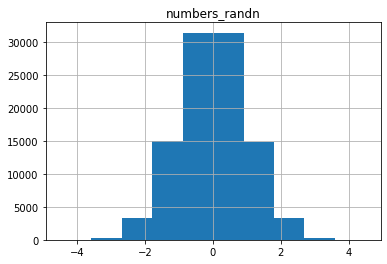

In [210]:
numbers.hist();

In [168]:
a = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1])

In [170]:
# массив из случайно выбранных чисел
# size - размер возвращаемого массива, reaplce=False без замещения
np.random.choice(a=a, size=5, replace=False)

array([0, 0, 1, 0, 0])

In [171]:
np.random.choice(a=np.arange(20), size=(2, 3), replace=True)

array([[15, 12, 17],
       [14, 12,  8]])

In [97]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]

In [98]:
a + b

[1, 2, 3, 4, 5, 6, 7, 8]

In [99]:
aa = np.array(a)
bb = np.array(b)

In [100]:
aa + bb

array([ 6,  8, 10, 12])

## Почему нужно использовать векторизованные вычисления?

Несмотря на то, что для создания единичной матрицы есть специальный метод, давайте посмотрим, как бы мы создавали её «вручную». Для этого нам потребовались бы вложенные циклы:

In [172]:
%%time
I = np.zeros((100, 100))

for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        if i == j:
            I[i][j] = 1
I

CPU times: user 934 µs, sys: 342 µs, total: 1.28 ms
Wall time: 894 µs


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [173]:
%%time
I = np.eye(100,100)
I

CPU times: user 68 µs, sys: 75 µs, total: 143 µs
Wall time: 137 µs


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [174]:
%%time
a = np.zeros(1000000, dtype=np.float64)
for i in range(1, 1000001):
    a[i - 1] = i ** 0.5
print(a)

[   1.            1.41421356    1.73205081 ...  999.999       999.9995
 1000.        ]
CPU times: user 228 ms, sys: 5.44 ms, total: 234 ms
Wall time: 234 ms


In [175]:
%%time
b = np.arange(1, 1000001, dtype=np.float64)
b = np.sqrt(b)
print(b)

[   1.            1.41421356    1.73205081 ...  999.999       999.9995
 1000.        ]
CPU times: user 6.11 ms, sys: 5.43 ms, total: 11.5 ms
Wall time: 10.1 ms


Данный пример заодно показывает одну важную особенность — массивы, как и списки, являются изменяемыми объектами в Python.

### Изменение размерности np.array

Вспомним, что у нас есть массив оценок студентов `grades`:

Как поменять структуру массива так, чтобы, например, оценки были записаны группами по три оценки? Воспользоваться методом `.reshape()`, который позволяет поменять форму массива.

In [176]:
grades

array([[3, 5, 5, 4, 3],
       [3, 3, 4, 3, 3],
       [5, 5, 5, 4, 6]])

In [178]:
grades.T

array([[3, 3, 5],
       [5, 3, 5],
       [5, 4, 5],
       [4, 3, 4],
       [3, 3, 6]])

In [183]:
grades2 = grades.reshape(1, 15)

In [184]:
grades2.shape

(1, 15)

In [186]:
grades.size

15

In [116]:
grades.reshape(5, -1)

array([[3, 5, 5],
       [4, 3, 3],
       [3, 4, 3],
       [3, 5, 5],
       [5, 4, 5]])

In [117]:
grades.reshape(-1, 3)

array([[3, 5, 5],
       [4, 3, 3],
       [3, 4, 3],
       [3, 5, 5],
       [5, 4, 5]])

In [118]:
grades.reshape(5, 4)

ValueError: cannot reshape array of size 15 into shape (5,4)

Теперь массив двумерный, и чтобы обратиться к элементу массива, нам нужно указывать две вещи: индекс списка и индекс элемента в этом списке. Метод `.reshape()` удобен, но при его использовании стоит помнить, что не любой массив можно превратить в массив другой формы – общее число элементов в массиве должно позволять получить новое число списков и элементов в них. Так, массив `grades`, в котором всего 15 элементов, нельзя превратить в массив вида `(2, 8)` (таблица $2 \times 8$), потому что для такой формы понадобится 16 элементов! И Python явно об этом сообщит:

In [119]:
grades.reshape(2, 8)

ValueError: cannot reshape array of size 15 into shape (2,8)

Если нам нужно просто поменять местами строки и столбцы в таблице, то есть списки в массиве, можно воспользоваться транспонированием, которое осуществляется в `NumPy` с помощью метода `.transpose()`:

In [119]:
grades

array([[3, 5, 5, 4, 3],
       [3, 3, 4, 3, 3],
       [5, 5, 5, 4, 5]])

In [187]:
grades.T 

array([[3, 3, 5],
       [5, 3, 5],
       [5, 4, 5],
       [4, 3, 4],
       [3, 3, 6]])

In [188]:
grades.transpose() 

array([[3, 3, 5],
       [5, 3, 5],
       [5, 4, 5],
       [4, 3, 4],
       [3, 3, 6]])

Кроме того, в противоположность `.reshape()`, который часто используется для разбиения одномерного массива на многомерный из нескольких маленьких списков, в `NumPy` существует «обратный» метод `.ravel()`, который позволяет любой многомерный массив превратить в одномерный, состоящий из одного списка, другими словами, сделать массив «плоским»:

In [189]:
grades

array([[3, 5, 5, 4, 3],
       [3, 3, 4, 3, 3],
       [5, 5, 5, 4, 6]])

In [191]:
gr = grades.ravel()
gr

array([3, 5, 5, 4, 3, 3, 3, 4, 3, 3, 5, 5, 5, 4, 6])

In [192]:
gr.shape

(15,)

In [193]:
grades.flatten()

array([3, 5, 5, 4, 3, 3, 3, 4, 3, 3, 5, 5, 5, 4, 6])

*Примечание:* в `NumPy` есть ещё другой метод для создания «плоских» массивов – `flatten()`.

### Проверка условий на массивах

Давайте посмотрим, каким образом можно проверять условия на массивах и отбирать элементы по условию. Создадим массив со значениями возраста:

In [211]:
ages = np.array([[15, 23, 32, 45, 52], 
               [68, 34, 55, 78, 20], 
               [25, 67, 33, 45, 14]])

Давайте попробуем узнать, какие значения массива соответствуют людям трудоспособного возраста: от 16 лет и старше:

In [212]:
ages >= 16  # больше или равно

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False]])

Все элементы, кроме первого в первом списке и кроме последнего в последнем списке: на всех позициях, кроме указанных, стоят значения `True`, что означает, что условие выполняется. То, что мы получили сейчас – это булев массив, массив, состоящий из булевых (логических) значений, значений `True` и `False`. 

Теперь попробуем сформулировать более сложное условие: проверим, какие элементы соответствуют людям старше 18, но младше 60 лет:

In [123]:
(ages > 18) & (ages < 60) # & - одновременное условие (как во множествах) | - логическое ИЛИ

array([[False,  True,  True,  True,  True],
       [False,  True,  True, False,  True],
       [ True, False,  True,  True, False]])

In [124]:
True & True

True

In [125]:
True & False

False

In [213]:
False | False

False

In [126]:
True | True # or, или

True

In [127]:
True | False

True

In [128]:
bool(0)

False

In [129]:
bool(1)

True

In [130]:
bool(1730172)

True

In [131]:
True + True

2

In [132]:
False + False

0

Как посчитать, сколько элементов массива удовлетворяют некоторым условиям?

Суммируем значения по всему массиву: Python понимает, что значение `True` – это 1, а `False` – это 0, поэтому нет необходимости превращать все значения в числовые, мы можем просто сложить все «единички»:

In [215]:
(ages > 18) & (ages < 60)

array([[False,  True,  True,  True,  True],
       [False,  True,  True, False,  True],
       [ True, False,  True,  True, False]])

In [214]:
((ages > 18) & (ages < 60)).sum()

10

In [216]:
ages.size

15

А теперь проверим, какие значения соответствуют людям либо младше 18, либо старше 60:

In [127]:
(ages < 18) | (ages > 60)  # | - или - хотя бы одно условие верно

array([[ True, False, False, False, False],
       [ True, False, False,  True, False],
       [False,  True, False, False,  True]])

А как увидеть сами значения, которые удовлетворяют определенным условиям? Заключить условие в квадратные скобочки:

In [136]:
ages

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

In [137]:
ages >= 16

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False]])

In [218]:
ages

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

In [217]:
ages[ages >= 16] #логический фильтр, маска, срез

array([23, 32, 45, 52, 68, 34, 55, 78, 20, 25, 67, 33, 45])

In [219]:
ages[(ages >= 16) & (ages < 60)]

array([23, 32, 45, 52, 34, 55, 20, 25, 33, 45])

Внимание: не забудьте круглые скобки для каждого условия, иначе Python поймёт всё неправильно и вернёт ошибку:

In [220]:
ages[ages >= 16 & ages < 60]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

https://numpy.org/doc/stable/reference/generated/numpy.where.html

### Запись списков в файл и чтение файлов со списками

Чтобы было проще работать, сначала обсудим запись списков, тем самым сохранив списки себе на компьютер, а потом будем загружать их в Python. Это удобно для хранения больших списков с данными + например, для сохранения результатов разных моделей.

Запишем массив `ages` в файл формата `.npy`: сначала укажем название файла, а затем – сам массив, который сохраняем.

In [221]:
import os
os.getcwd() #get Current Working Directory

'/Users/maksimkarpov/Documents/GitHub/Python_DPO_2022/lect14_numpy_pandas_intro'

In [222]:
np.save("ages.npy", ages)

Теперь этот файл можно увидеть во вкладке *Home* в Jupyter Notebook, в рабочей папке. Попробуем выполнить обратную операцию: считаем массив из numpy-файла:

In [223]:
np.load("ages.npy")

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

Выгружать списки можно в разные форматы. Например, можно просто сохранить массив в текстовый файл с расширением `.txt`:

In [224]:
np.savetxt("ages.txt", ages)

И аналогичным образом считать:

In [225]:
np.loadtxt("ages.txt")

array([[15., 23., 32., 45., 52.],
       [68., 34., 55., 78., 20.],
       [25., 67., 33., 45., 14.]])

Если нет необходимости работать с файлами, можем просто превратить массив в другой объект Python. Например, в обычный список:

In [227]:
ages

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

In [230]:
b = ages.tolist() #возвращается список списков
b

[[15, 23, 32, 45, 52], [68, 34, 55, 78, 20], [25, 67, 33, 45, 14]]

In [231]:
type(b[0])

list

In [233]:
c = list(ages) #возвращается список np массивов
c

[array([15, 23, 32, 45, 52]),
 array([68, 34, 55, 78, 20]),
 array([25, 67, 33, 45, 14])]

In [234]:
type(c[0])

numpy.ndarray

In [145]:
ages

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

Или строку:

In [146]:
np.array2string(ages)

'[[15 23 32 45 52]\n [68 34 55 78 20]\n [25 67 33 45 14]]'

# Операции с векторами и матрицами в нампай

#### Скалярное произведение векторов

In [229]:
a = np.array([3, 1, 5, 2])
b = np.array([2, 5, 2, 4])
# <a, b> = 3*2 + 1*5 + 5*2 + 2*4
print(a @ b)    # python 3 style
print(a.dot(b)) 
print(np.dot(a, b))

29
29
29


In [235]:
a = np.array([3, 1, 5, 2])
b = np.array([2, 5, 2, 4, 4])
print(a @ b) 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

#### Умножение матриц
  
Операция умножения определена для двух матриц, таких что число столбцов первой равно числу строк второй. 

Пусть матрицы $A$ и $B$ таковы, что $A \in \mathbb{R}^{n \times k}$ и $B \in \mathbb{R}^{k \times m}$.    
__Произведением__ матриц $A$ и $B$ называется матрица $C$, такая что 
$$c_{ij} = \sum_{r=1}^{k} a_{ir}b_{rj}$$, 
где  $c_{ij}$ — элемент матрицы $C$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

<img src="https://habrastorage.org/webt/ou/_g/wg/ou_gwgmqlsqlzlelu93s1q7vetw.png" width=300>

In [238]:
a

array([[1, 2],
       [2, 0]])

In [239]:
b

array([[2, 5],
       [1, 3]])

In [236]:
a = np.array([[1, 2], [2, 0]])
b = np.array([[2, 5], [1, 3]])
# print(a)
# print(b)
print(a @ b)    # python 3 style
print(a.dot(b)) 
print(np.dot(a, b))

[[ 4 11]
 [ 4 10]]
[[ 4 11]
 [ 4 10]]
[[ 4 11]
 [ 4 10]]


In [152]:
# c[0][0] = 1 * 2 + 2 * 1 = 4
# c[0][1] = 1 * 5 + 2 * 3 = 11
# c[1][0] = 2 * 2 + 0 * 1 = 4
# c[1][1] = 2 * 5 + 0 * 3 = 10

In [150]:
a

array([[1, 2],
       [2, 0]])

In [151]:
b

array([[2, 5],
       [1, 3]])

In [142]:
a = np.array([[1, 2], [2, 0]])
b = np.array([1, 2])
print(a @ b)

[5 2]


**!!!Не путайте поокординатное умножение с матричным!!!**

In [240]:
a

array([[1, 2],
       [2, 0]])

In [241]:
b

array([[2, 5],
       [1, 3]])

In [141]:
print(a * b)

[[ 2 10]
 [ 2  0]]


#### Умножение матриц и векторов

<img src="https://dev.opera.com/articles/understanding-the-css-transforms-matrix/5.png">

In [242]:
m = np.array([[1, 2], [0, 1], [2, 4]])
print(m)
v = np.array([2, 5])
print("v = ",v)
m @ v

[[1 2]
 [0 1]
 [2 4]]
v =  [2 5]


array([12,  5, 24])

## Полезные фукнции и методы для работы с массивами



In [247]:
np.random.seed(42)
a = np.random.choice(a=np.linspace(1, 50, 50), size=10, replace=True)
print(a)

[39. 29. 15. 43.  8. 21. 39. 19. 23. 11.]


In [248]:
np.linspace(1, 50, 50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

**1. Замена элементов по индексу**

In [250]:
a

array([-44.,  29., -55.,  43.,   8.,  21.,  39.,  19.,  23.,  11.])

In [251]:
np.put(a, ind=[0, 2], v=[-2, -3])
a

array([-2., 29., -3., 43.,  8., 21., 39., 19., 23., 11.])

**2. Выделение массива по условию**

In [258]:
# замена элементов массива по условию: a if a < 0 else 0
np.where(a < 0, a, 0)

array([-2.,  0., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [255]:
a

array([-2., 29., -3., 43.,  8., 21., 39., 19., 23., 11.])

In [256]:
a[a > 10]

array([29., 43., 21., 39., 19., 23., 11.])

In [257]:
# выбор элементов по условию
a[np.where(a > 10)]

array([29., 43., 21., 39., 19., 23., 11.])

**3. Сортировка**

In [262]:
a

array([-2., 29., -3., 43.,  8., 21., 39., 19., 23., 11.])

In [259]:
# сортировка
np.sort(a)

array([-3., -2.,  8., 11., 19., 21., 23., 29., 39., 43.])

In [263]:
# индексы сортированного нампаевского массива
np.argsort(a)

array([2, 0, 4, 9, 7, 5, 8, 1, 6, 3])

**4. Any и All для сложных логических условий**

`Any` возвращает True, если хотя бы один элемент `True`   
`All` возвращает True, если все эедементы `True`

In [264]:
any([True, True, False, True, False, False, False])

True

In [265]:
all([True, True, False, True, False, False, False])

False

In [266]:
# сравнение векторов
np.array([1, 1, 0, 0]) == np.array([1, 1, 0, 2])

array([ True,  True,  True, False])

In [267]:
all(np.array([1, 1, 0, 0]) == np.array([1, 1, 0, 2]))

False

In [268]:
any(np.array([1, 1, 0, 0]) == np.array([1, 1, 0, 2]))

True

# Exercises

1. Create a 3x3 matrix with values ranging from 0 to 8

`hint: reshape`

In [270]:
#your code
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

2. Create a random vector of size 30 and find the mean value

`hint: mean`

In [276]:
#your code
np.random.seed(30)
round(np.random.rand(30).mean(), 3)

0.492

3. How to add a border (filled with 0's) around an existing array?

`hint: np.pad`

In [277]:
#your code padding
Z = np.ones((5,5))
Z

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [278]:
Z = np.pad(Z, pad_width=1, mode='constant', constant_values=0)
print(Z)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [279]:
Z[:, [0, -1]] = 0

Z[[0, -1], :] = 0

print(Z)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


4. Create a 5x5 matrix with row values ranging from 0 to 4

`hint: np.arange`

In [286]:
#your code
Z = np.ones((5, 5))

Z

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [287]:
Z += np.array([0, 1, 2, 3, 4])

Z

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])